In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

GenFR2021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_FR_20210101-20211231.csv")

GenFR2021 = GenFR2021.replace('n/e', np.NaN)
GenFR2021 = GenFR2021.replace('N/A', np.NaN)

GenFR2021 = pd.DataFrame({'Date': GenFR2021.iloc[:,1],
                          'Nuclear [MWh]': GenFR2021.iloc[:,16]})
GenFR2021.iloc[71,1] = np.nanmean(GenFR2021.iloc[70:73,1])

print(GenFR2021.to_string())

                                                Date  Nuclear [MWh]
0     01.01.2021 00:00 - 01.01.2021 01:00 (CET/CEST)        50378.0
1     01.01.2021 01:00 - 01.01.2021 02:00 (CET/CEST)        49465.0
2     01.01.2021 02:00 - 01.01.2021 03:00 (CET/CEST)        48294.0
3     01.01.2021 03:00 - 01.01.2021 04:00 (CET/CEST)        48380.0
4     01.01.2021 04:00 - 01.01.2021 05:00 (CET/CEST)        48560.0
5     01.01.2021 05:00 - 01.01.2021 06:00 (CET/CEST)        48534.0
6     01.01.2021 06:00 - 01.01.2021 07:00 (CET/CEST)        48558.0
7     01.01.2021 07:00 - 01.01.2021 08:00 (CET/CEST)        48677.0
8     01.01.2021 08:00 - 01.01.2021 09:00 (CET/CEST)        49538.0
9     01.01.2021 09:00 - 01.01.2021 10:00 (CET/CEST)        50023.0
10    01.01.2021 10:00 - 01.01.2021 11:00 (CET/CEST)        50316.0
11    01.01.2021 11:00 - 01.01.2021 12:00 (CET/CEST)        50616.0
12    01.01.2021 12:00 - 01.01.2021 13:00 (CET/CEST)        50295.0
13    01.01.2021 13:00 - 01.01.2021 14:00 (CET/C

In [2]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenFR2021.iloc[:,0])):
        if i < 86:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2021.iloc[start,0]
            opNu = sum(GenFR2021.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif i == 86: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2066
            end = 2088
            day = GenFR2021.iloc[start,0]
            opNu = sum(GenFR2021.iloc[start:skip,1]) + sum(GenFR2021.iloc[(skip+1):end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif 87 <= i < 303:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2021.iloc[start,0]
            opNu = sum(GenFR2021.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif i == 303:
            start = 24*i
            skip = 7274
            end = 7297
            day = GenFR2021.iloc[start,0]
            opNu = sum(GenFR2021.iloc[start:skip,1]) + sum(GenFR2021.iloc[skip+2:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif 304 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenFR2021.iloc[start,0]
            opNu = sum(GenFR2021.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
    df = pd.DataFrame(result, columns=['Day','Nuclear [MWh]'])
    return df

FRGen2021 = function().round(2)
FRGen2021["Day"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
print(FRGen2021.to_string())

           Day  Nuclear [MWh]
0   2021-01-01      1199568.0
1   2021-01-02      1219450.0
2   2021-01-03      1213397.5
3   2021-01-04      1228815.0
4   2021-01-05      1228078.0
5   2021-01-06      1236516.0
6   2021-01-07      1240934.0
7   2021-01-08      1240437.0
8   2021-01-09      1237731.0
9   2021-01-10      1237012.0
10  2021-01-11      1241074.0
11  2021-01-12      1221853.0
12  2021-01-13      1198252.0
13  2021-01-14      1219106.0
14  2021-01-15      1226568.0
15  2021-01-16      1186926.0
16  2021-01-17      1194260.0
17  2021-01-18      1204767.0
18  2021-01-19      1152258.0
19  2021-01-20      1163211.0
20  2021-01-21      1133095.0
21  2021-01-22      1160115.0
22  2021-01-23      1192470.0
23  2021-01-24      1215009.0
24  2021-01-25      1186775.0
25  2021-01-26      1186105.0
26  2021-01-27      1198951.0
27  2021-01-28      1160030.0
28  2021-01-29      1110747.0
29  2021-01-30      1092306.0
30  2021-01-31      1128700.0
31  2021-02-01      1168931.0
32  2021-0

In [3]:
GenFR2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\Generation_FR_20220101-20221231.csv")

GenFR2022 = GenFR2022.replace('n/e', np.NaN)
GenFR2022 = GenFR2022.replace('N/A', np.NaN)

GenFR2022 = pd.DataFrame({'Date': GenFR2022.iloc[:,1],
                          'Nuclear [MWh]': GenFR2022.iloc[:,16]})

#GenFR2022.iloc[289,1] = (GenFR2022.iloc[288,1] + GenFR2022.iloc[290,1])/2
#GenFR2022.iloc[3637,1] = (GenFR2022.iloc[3636,1] + GenFR2022.iloc[3638,1])/2

GenFR2022.iloc[5265,1] = np.nanmean(GenFR2022.iloc[5264:5267,1])

print(GenFR2022.to_string())

                                                Date  Nuclear [MWh]
0     01.01.2022 00:00 - 01.01.2022 01:00 (CET/CEST)        39523.0
1     01.01.2022 01:00 - 01.01.2022 02:00 (CET/CEST)        38466.0
2     01.01.2022 02:00 - 01.01.2022 03:00 (CET/CEST)        37836.0
3     01.01.2022 03:00 - 01.01.2022 04:00 (CET/CEST)        36816.0
4     01.01.2022 04:00 - 01.01.2022 05:00 (CET/CEST)        36359.0
5     01.01.2022 05:00 - 01.01.2022 06:00 (CET/CEST)        36759.0
6     01.01.2022 06:00 - 01.01.2022 07:00 (CET/CEST)        37298.0
7     01.01.2022 07:00 - 01.01.2022 08:00 (CET/CEST)        37624.0
8     01.01.2022 08:00 - 01.01.2022 09:00 (CET/CEST)        39311.0
9     01.01.2022 09:00 - 01.01.2022 10:00 (CET/CEST)        39731.0
10    01.01.2022 10:00 - 01.01.2022 11:00 (CET/CEST)        40138.0
11    01.01.2022 11:00 - 01.01.2022 12:00 (CET/CEST)        40756.0
12    01.01.2022 12:00 - 01.01.2022 13:00 (CET/CEST)        40987.0
13    01.01.2022 13:00 - 01.01.2022 14:00 (CET/C

In [4]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(GenFR2022.iloc[:,0])):
        if i < 85:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2022.iloc[start,0]
            opNu = sum(GenFR2022.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif i == 85: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2042
            end = 2064
            day = GenFR2022.iloc[start,0]
            opNu = sum(GenFR2022.iloc[start:skip,1]) + sum(GenFR2022.iloc[skip+1:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif 86 <= i < 302:
            start = 24*i
            end = 24*(i+1)
            day = GenFR2022.iloc[start,0]
            opNu = sum(GenFR2022.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif i == 302:
            start = 24*i
            skip = 7250
            end = 7273
            day = GenFR2022.iloc[start,0]
            opNu = sum(GenFR2022.iloc[start:skip,1]) + sum(GenFR2022.iloc[skip+1:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
        elif 303 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = GenFR2022.iloc[start,0]
            opNu = sum(GenFR2022.iloc[start:end,1])
            result.append({"Day": day, "Nuclear [MWh]": opNu})
    df = pd.DataFrame(result, columns=['Day','Nuclear [MWh]'])
    return df

FRGen2022 = function().round(2)
FRGen2022["Day"] = pd.date_range(start="1/1/2022", periods=365, freq="D")
print(FRGen2022.to_string())

           Day  Nuclear [MWh]
0   2022-01-01       956188.0
1   2022-01-02       943520.0
2   2022-01-03      1004384.0
3   2022-01-04      1076214.0
4   2022-01-05      1096611.0
5   2022-01-06      1136062.0
6   2022-01-07      1133265.0
7   2022-01-08      1093037.0
8   2022-01-09      1102374.0
9   2022-01-10      1163283.0
10  2022-01-11      1135627.0
11  2022-01-12      1138704.0
12  2022-01-13      1247909.0
13  2022-01-14      1158612.0
14  2022-01-15      1161352.0
15  2022-01-16      1164240.0
16  2022-01-17      1166767.0
17  2022-01-18      1161877.0
18  2022-01-19      1162638.0
19  2022-01-20      1156210.0
20  2022-01-21      1168633.0
21  2022-01-22      1182862.0
22  2022-01-23      1159712.0
23  2022-01-24      1178598.0
24  2022-01-25      1174990.0
25  2022-01-26      1183417.0
26  2022-01-27      1175409.0
27  2022-01-28      1180769.0
28  2022-01-29      1150098.0
29  2022-01-30      1165023.0
30  2022-01-31      1142785.0
31  2022-02-01      1140164.0
32  2022-0

In [5]:
FRGen = pd.concat([FRGen2021["Nuclear [MWh]"], FRGen2022["Nuclear [MWh]"]], ignore_index=True).to_frame("Nuclear [MWh]")
#FRGen["PSH [MWh]"] = pd.concat([FRGen2021["PSH [MWh]"], FRGen2022["PSH [MWh]"]], ignore_index=True).to_frame("PSH [MWh]")
#FRGen["Hydro [MWh]"] = pd.concat([FRGen2021["Hydro [MWh]"], FRGen2022["Hydro [MWh]"]], ignore_index=True).to_frame("Hydro [MWh]")

FRGen["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "Nuclear [MWh]"] #, "PSH [MWh]", "Hydro [MWh]"]

#FRGen["Wind [MWh]"] = pd.to_numeric(FRGen["Wind [MWh]"], errors='coerce')
FRGen = pd.DataFrame(FRGen)

#FRGen["BZN|FR"] = FRGen["BZN|FR"].round(2)

FRGen = FRGen.reindex(columns=NewOrder)

FRGen

,Date,Nuclear [MWh]
0,2021-01-01,1199568.0
1,2021-01-02,1219450.0
2,2021-01-03,1213397.5
3,2021-01-04,1228815.0
4,2021-01-05,1228078.0
...,...,...
725,2022-12-27,884494.0
726,2022-12-28,877874.0
727,2022-12-29,776725.0
728,2022-12-30,733162.0


(18591.55, 19393.45)


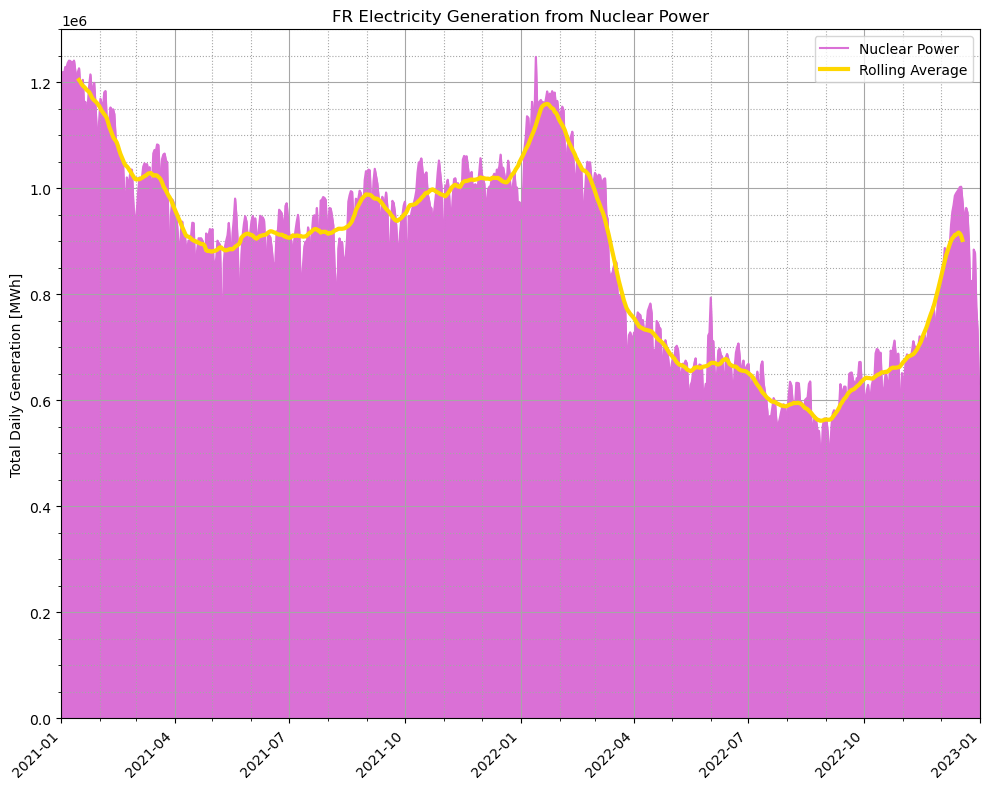

In [6]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title("FR Electricity Generation from Nuclear Power")
plt.ylabel('Total Daily Generation [MWh]')

ax.plot(FRGen["Date"], FRGen["Nuclear [MWh]"], color="orchid", label="Nuclear Power")
#ax.plot(FRGen["Date"], FRGen["PSH [MWh]"], label="PSH")
#ax.plot(FRGen["Date"], FRGen["Hydro [MWh]"], label="PSH")
ax.plot(FRGen["Date"], FRGen["Nuclear [MWh]"].rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")
#ax.plot(ImportData["Date"], Mean, label="RMS", color='black')


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0,1300000)
plt.tight_layout()

plt.fill_between(FRGen["Date"], FRGen["Nuclear [MWh]"], color="orchid")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

[-1.79419507e-06  6.54782122e+00]
6.5478212179963


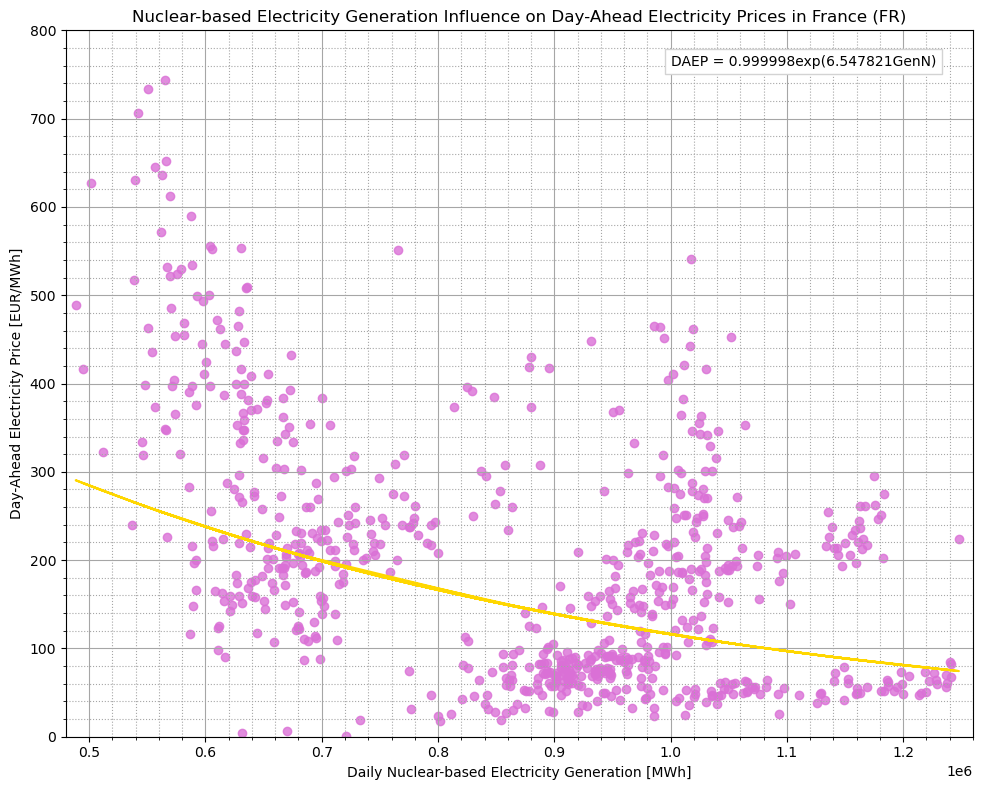

In [7]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy
import math

%store -r BZFR

FRGen["FR Electricity DA [EUR/MWh]"] = BZFR["BZN|FR"]

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

sns.regplot(x=FRGen["Nuclear [MWh]"].astype(float), 
            y=FRGen["FR Electricity DA [EUR/MWh]"].astype(float), 
            scatter = True, ci = 100, fit_reg = False,
            scatter_kws = {"color": "orchid"})

#slope, intercept, r, FRGen, sterr = scipy.stats.linregress(x=FRGen["Nuclear [MWh]"].astype(float),
#                                                       y=FRGen["FR Electricity DA [EUR/MWh]"].astype(float))

def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

x_data = np.array(FRGen["Nuclear [MWh]"])
y_data = np.array(FRGen["FR Electricity DA [EUR/MWh]"])

log_y_data = np.log(y_data)

curve_fit = np.polyfit(x_data, log_y_data, 1)
print(curve_fit)
print(curve_fit[1])

ycurve = np.exp(curve_fit[1])*np.exp(curve_fit[0]*x_data)

plt.plot(x_data, ycurve, color="gold")

A = round(math.e**curve_fit[0], 6)
B = round(curve_fit[1], 6)

plt.text(1000000, 760, 'DAEP = ' + str(A) + 'exp(' + str(B) + 'GenN)',
                 bbox=dict(facecolor='white', edgecolor='lightgrey'))

#plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

plt.title('Nuclear-based Electricity Generation Influence on Day-Ahead Electricity Prices in France (FR)')
plt.xlabel('Daily Nuclear-based Electricity Generation [MWh]')
plt.ylabel('Day-Ahead Electricity Price [EUR/MWh]')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#fig.autofmt_xdate()

#plt.tick_params(axis='x', which='major', labelsize=10)
#plt.xticks(rotation=45, ha='right')
plt.xlim(480000, 1260000)
plt.ylim(0, 800)
plt.tight_layout()

#ax.xaxis.set_minor_locator(mdates.MonthLocator())
#ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [11]:
from scipy.stats import spearmanr

rhoFRN_BZNFR, pFRN_BZNFR = spearmanr(x_data, y_data)

print("rho:", rhoFRN_BZNFR)
print("p:", pFRN_BZNFR)

rho: -0.39820892831329147
p: 3.749694349389308e-29


In [ ]:
%store rhoFRN_BZNFR
%store pFRN_BZNFR
%store FRGen